# Day001 (2018/12/15)
## 資料介紹與評估指標
***
首次遇到資料時，該思考哪些問題?
1. 為什麼這個問題重要?
   
    - 好玩，e.g.[預測吃雞生存機率](https://www.kaggle.com/c/pubg-finish-placement-prediction)
    - 企業的核心問題，e.g.[廣告投放](https://www.kaggle.com/c/avito-demand-prediction)
    - 公眾利益/影響決策方向，e.g.[停車方針](https://www.kaggle.com/new-york-city/nyc-parking-tickets/home)，[計程車載客優化](https://www.kaggle.com/c/nyc-taxi-trip-duration)
    - 對世界有貢獻，e.g.[肺炎偵測](https://www.kaggle.com/c/rsna-pneumonia-detection-challenge)


2. 資料從何而來?

    - 來源與品質息息相關
    - 根據不同資料源，我們可以合理的推測/懷疑資料異常的理由與頻率
    

3. 資料的型態為何?

    - 結構化資料: 如數值、表格，要檢視欄位意義以及名稱
    - 非結構化資料: 如圖像、文字、音訊，需要思考資料轉換與標準化方式
    

4. 我們可以回答甚麼問題與如何評估?

    每個問題都應該要可以被驗證，也就是有一個可供衡量的數學評估指標(Evaluation Matrics)
    - 分類問題: 正確率、AUC (Area Under Curve)、MAP (Mean Average Precision)...，參考[AP/mAP/AUC/ROC 最全概念區分](https://blog.csdn.net/qq_34654240/article/details/80176457)
    - 迴歸問題：MAE (Mean Absolute Error), RMSE (Root Mean Square Error)...，參考[Evaluation Metrics](https://blog.csdn.net/aws3217150/article/details/50479457)

## HW1
### 我選擇的資料為 [Traveling Santa 2018 - Prime Paths](https://www.kaggle.com/c/traveling-santa-2018-prime-paths)
1.你選的這組資料為何重要

> 聖誕節快到了，Rudolph得趕快規劃好路徑!!

2.資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

> 資料為假設的城市與其座標。

3.蒐集而來的資料型態為何

> 資料中包含有城市的ID，以及其x, y軸的座標。

4.這組資料想解決的問題如何評估

> 在由北極(ID = 0)出發並由北極結束，加上每個城市至少拜訪過一次，且規定每10步除非是由ID為質數的城市出發否則長度要增加10%的情況下，所有距離的加總最小。

## HW2
想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：


1.核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

> 提升業績代表要以更低的成本在有限的時間內載到更多客人，因此我假設分析資料後應該要減少司機等待客人的時間，以及找出較好的路徑使得在客人與客人之間移動的成本減低。

2.資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

> 客人上、下車的地點可能會造成影響，因此需要收集司機不同日期的路徑資料和油錢等成本，以gps紀錄路徑，並詳細記錄維修以及汽油等成本。

3.蒐集而來的資料型態為何

> 蒐集而來的資料應包含每次載客的路徑(上、下車位置與行經的里程數)以及成本(以台幣為單位)，還有等待乘客間行經的里程數與成本，因此皆為數值型態的結構化資料。

4.你要回答的問題，其如何評估 (tips：你的假設如何驗證)

> 可利用司機等待乘客的時間以及成本是否降低來驗證我的假設。

## 統計指標範例
### 常見於迴歸問題的評估指標
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
### 常見於分類問題的評估指標
- Binary Cross Entropy (CE)

*後面的課程會詳細說明*

In [1]:
# Import necessary library
import numpy as np
import matplotlib.pyplot as plt

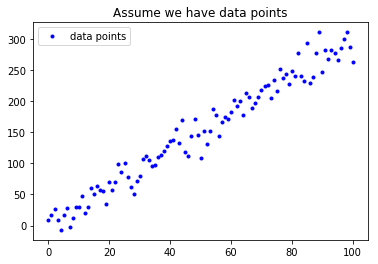

In [2]:
# Create a data set
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

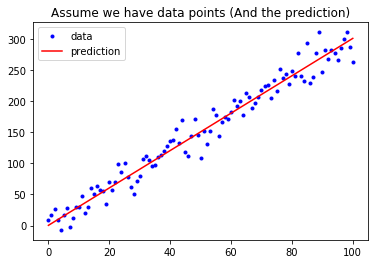

In [3]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [4]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

## HW3
## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [5]:
def mean_squared_error(y, yp):
    """
    Compute MSE
    Args:
        - y: Real value
        - yp: Predic value
    Return:
        - mse: Mean Squared Error
    """
    mse = sum((y - yp)**2) / len(y)
    return mse

In [6]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 281.015
The Mean absolute error is 13.416
